In [1]:
using Revise

In [8]:
# using OpticalBlochEquations
using QuantumStates
using LinearAlgebra
using Parameters
using CompositeStructs
using BenchmarkTools

In [9]:
@consts begin
    ħ = 1.054e-34
    c = 3.0e8
    ϵ₀ = 8.854e-12
    kB = 1.381e-23
    T = 295
end
;

In [10]:
@composite @kwdef mutable struct HundsCaseB_VibRot <: HundsCaseB
    p::Int64
    v1::Float64
    v2::Float64
    v3::Float64
    HundsCaseB_Rot...
end
;

In [11]:
function Γ(state::HundsCaseB_VibRot, state′::HundsCaseB_VibRot)
    E = state.E
    E′ = state′.E
    ΔE = E′ - E
    if ΔE > 0.0
        return (8π^2 / (3ϵ₀*ħ*c^3)) * abs(ΔE)^3 * TDM(state, state′)^2
    end
    return 0.0
end
;

In [12]:
function blackbody_rate(state::HundsCaseB, state′::HundsCaseB)
    E = state.E
    E′ = state′.E
    ΔE_abs = abs(E′ - E)  
    if ΔE_abs > 0.0
        return (8π^2 / (3ϵ₀*ħ*c^3)) * (1 / (exp(ħ * (2π * ΔE_abs) / (kB * T)) - 1)) * 
            ΔE_abs^3 * TDM(state, state′)^2
    end
    return 0.0
end
;

In [13]:
function parity_rule(state::HundsCaseB_VibRot, state′::HundsCaseB_VibRot)
    p = state.p
    p′ = state′.p
    return δ(-p,p′)
end
; 

In [14]:
# Spectroscopic constants for X(000)
# (Scurlock et al.)
@consts begin
    B_X000 = 10023.0841
    D_X000 = 1.154e-2
    γ_X000 = 34.7593
end
;

In [15]:
function set_parity!(basis, sgn=1)
    for i in eachindex(basis)
        N = basis[i].N
        basis[i].p = sgn * (1 * iseven(N) - 1 * isodd(N))
    end
    return nothing
end
;

### Enumerate states in $X^2 \Sigma^+$ of CaOH

In [16]:
N_max = 5;

### $(v_1 v_2^\ell v_3) = (000)$

In [270]:
E_X000 = 0.0

QN_bounds = (E = E_X000, v1 = 0, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X000_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X000_basis)
;

### $(v_1 v_2^\ell v_3) = (100)$

In [18]:
E_X100 = 1e2 * 600 * c

QN_bounds = (E = E_X100, v1 = 1, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X100_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X100_basis)
;

### $(v_1 v_2^\ell v_3) = (200)$

In [19]:
E_X200 = 2E_X100

QN_bounds = (E = E_X200, v1 = 2, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X200_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X200_basis)
;

### $(v_1 v_2^\ell v_3) = (300)$

In [20]:
E_X300 = 3E_X100

QN_bounds = (E = E_X300, v1 = 3, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X300_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X300_basis)
;

### $(v_1 v_2^\ell v_3) = (01^10)$

In [21]:
E_X0110 = 1e2 * 352 * c

QN_bounds = (E = E_X0110, v1 = 0, v2 = 1, v3 = 0, S = 1/2, I = 1/2, Λ = 1, N = 1:N_max)
X0110_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0110_basis_p_parity)

X0110_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0110_basis_m_parity, -1)

X0110_basis = [X0110_basis_p_parity; X0110_basis_m_parity]
;

### $(v_1 v_2^\ell v_3) = (02^00)$

In [22]:
E_X0200 = 2E_X0110

QN_bounds = (E = E_X0200, v1 = 0, v2 = 2, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X0200_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
;

### $(v_1 v_2^\ell v_3) = (02^20)$

In [23]:
E_X0220 = E_X0200

QN_bounds = (E = E_X0220, v1 = 0, v2 = 2, v3 = 0, S = 1/2, I = 1/2, Λ = 2, N = 2:N_max)
X0220_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0220_basis_p_parity)

X0220_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0220_basis_m_parity, -1)

X0220_basis = [X0220_basis_p_parity; X0220_basis_m_parity]
;

### $(v_1 v_2^\ell v_3) = (11^10)$

In [24]:
E_X1110 = E_X100 + E_X0110

QN_bounds = (E = E_X1110, v1 = 1, v2 = 1, v3 = 0, S = 1/2, I = 1/2, Λ = 1, N = 1:N_max)
X1110_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X1110_basis_p_parity)

X1110_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X1110_basis_m_parity, -1)

X1110_basis = [X1110_basis_p_parity; X1110_basis_m_parity]
;

### Add blackbody-induced transitions and spontaneous emission

In [25]:
basis = [
    X000_basis
    X100_basis
    X200_basis
    X300_basis
    X0110_basis
    X0200_basis
    X0220_basis
    X1110_basis
    ]
;

In [53]:
X000_idxs, _ = subspace(basis, (v1 = (0,0), v2 = (0,0)))
X100_idxs, _ = subspace(basis, (v1 = (1,1), v2 = (0,0)))
X200_idxs, _ = subspace(basis, (v1 = (2,2), v2 = (0,0)))
X300_idxs, _ = subspace(basis, (v1 = (3,3), v2 = (0,0)))
X0110_idxs, _ = subspace(basis, (v1 = (0,0), v2 = (1,1)))
X0200_idxs, _ = subspace(basis, (v2 = (2,2), Λ = (0,0)))
X0220_idxs, _ = subspace(basis, (v2 = (2,2), Λ = (2,2)))
X1110_idxs, _ = subspace(basis, (v1 = (1,1), v2 = (1,1)))
;

In [54]:
# Get indices of detectable states
X000_idxs_d, _ = subspace(basis, (v1 = (0,0), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X100_idxs_d, _ = subspace(basis, (v1 = (1,1), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X200_idxs_d, _ = subspace(basis, (v1 = (2,2), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X300_idxs_d, _ = subspace(basis, (v1 = (3,3), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X0110_idxs_d, _ = subspace(basis, (v1 = (0,0), v2 = (1,1), N = (1,2), p = (-1,-1)))
X0200_idxs_d, _ = subspace(basis, (v2 = (2,2), Λ = (0,0), N = (1,1), J = (1/2, 3/2)))
X0220_idxs_d, _ = subspace(basis, (v2 = (2,2), Λ = (2,2), N = (2,2), J = (1/2, 3/2), p = (-1,-1)))
X1110_idxs_d, _ = subspace(basis, (v1 = (1,1), v2 = (1,1), N = (1,2), J = (1/2, 3/2), p = (-1,-1)))
idxs_d = [
    X000_idxs_d
    X100_idxs_d
    X200_idxs_d
    X300_idxs_d
    X0110_idxs_d
    X0200_idxs_d
    X0220_idxs_d
    X1110_idxs_d
]
;

In [55]:
μ_M = zeros(Float64, length(basis), length(basis))
;

In [88]:
function update_μ_M!(μ_M, idxs, μ_v1, μ_v2)
    
    μ_M .= 0.0
    
    # Stretching modes
    μ_M[idxs.X000_idxs, idxs.X100_idxs] .= μ_v1^2
    μ_M[idxs.X100_idxs, idxs.X200_idxs] .= 2μ_v1^2
    μ_M[idxs.X200_idxs, idxs.X300_idxs] .= 3μ_v1^2
    
    # Bending modes
    μ_M[idxs.X000_idxs, idxs.X0110_idxs] .= μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X0200_idxs] .= μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X0220_idxs] .= μ_v2^2
    
    # Hybrid modes
    μ_M[idxs.X100_idxs, idxs.X1110_idxs] .= μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X1110_idxs] .= μ_v1^2
    
    μ_M .+= transpose(μ_M)
    
    return nothing
end
;

In [89]:
idxs = (
    X000_idxs = X000_idxs, 
    X100_idxs = X100_idxs, 
    X200_idxs = X200_idxs, 
    X300_idxs = X300_idxs, 
    X0110_idxs = X0110_idxs, 
    X0200_idxs = X0200_idxs, 
    X0220_idxs = X0220_idxs, 
    X1110_idxs = X1110_idxs
);

In [90]:
# idxs = @params (X000_idxs, X100_idxs, X200_idxs, X300_idxs, X0110_idxs, X0200_idxs, X0220_idxs, X1110_idxs);

In [91]:
# @btime update_μ_M!(μ_M, idxs, μ_v1, μ_v2)

In [92]:
blackbody_M = zeros(Float64, length(basis), length(basis))
Γ_M = zeros(Float64, length(basis), length(basis))
@time for (i, state) in enumerate(basis)
    for (j, state′) in enumerate(basis)
        blackbody_M[i,j] += parity_rule(state, state′) * blackbody_rate(state, state′)
        Γ_M[i,j] += parity_rule(state, state′) * Γ(state, state′)
    end
end
;

149.665292 seconds (1.84 G allocations: 56.845 GiB, 22.04% gc time, 0.50% compilation time)


In [151]:
function construct_rate_eqns!(R, p)
    
    update_μ_M!(p.μ_M, p.idxs, p.μ_v1, p.μ_v2)
    
    R .= 0.0
    for i in eachindex(p.basis)
        for j in eachindex(p.basis)
            R[i,j] += p.μ_M[i,j] * p.blackbody_M[i,j]
            R[i,j] += p.μ_M[i,j] * p.Γ_M[i,j]          
            
            R[j,j] -= p.μ_M[i,j] * p.blackbody_M[i,j]
            R[j,j] -= p.μ_M[i,j] * p.Γ_M[i,j]
        end
    end
    
    # Vacuum loss terms
    for i in eachindex(p.basis)
        R[i,i] -= (1 / p.τ_vacuum)
    end
    
    return nothing
end
;

In [253]:
μ_M = zeros(Float64, length(basis), length(basis))
μ_v1 = 0.36 * 3.336e-30
μ_v2 = 0.38 * 3.336e-30
τ_vacuum = 2.0
;

In [254]:
R = zeros(Float64, length(basis), length(basis))
p = (μ_M = μ_M, Γ_M = Γ_M, blackbody_M = blackbody_M, basis = basis, idxs = idxs, μ_v1 = μ_v1, μ_v2 = μ_v2, τ_vacuum = τ_vacuum)
@time construct_rate_eqns!(R, p)
;

  0.119451 seconds (2 allocations: 18.000 MiB)


In [255]:
-1 / R[X100_idxs, X100_idxs][1]

0.08918825042995299

In [256]:
-1 / R[X0110_idxs, X0110_idxs][1]

0.3794380314049443

In [257]:
# @btime construct_rate_eqns!($R, $p)

In [258]:
n0 = zeros(length(basis))
n0[X000_idxs_d[1]] = 0.0
n0[X100_idxs_d[1]] = 1.0
dn0 = deepcopy(n0)
;

In [259]:
using DifferentialEquations
using Plots
using BenchmarkTools

In [260]:
function rate_eqns!(dn, n, R, t)
    mul!(dn, R, n)
    return nothing
end
;

In [261]:
# @btime rate_eqns!($dn0, $n0, $R, 1.0)

In [269]:
tspan = (0.0, 3.0)
prob = ODEProblem(rate_eqns!, n0, tspan, R)
@time sol = DifferentialEquations.solve(prob)
;

  1.087629 seconds (408 allocations: 39.139 MiB)


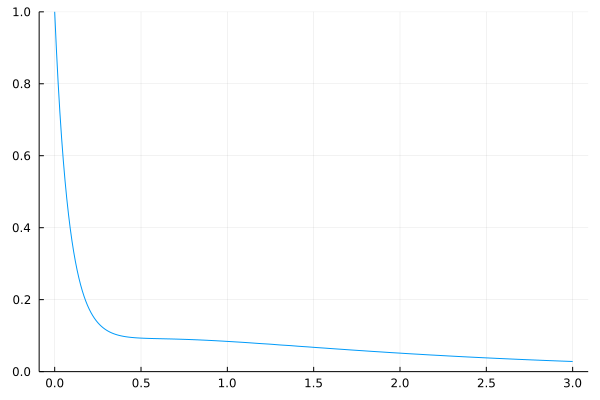

In [263]:
times = 0:10e-3:tspan[2]
sol_values = sol(times)

detectable = [sum(u[idxs_d]) for u in sol_values]

plot(times, detectable, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0, 1)
)


 ------------ Single Exponential fit ----------- 

 Equation: y = a exp(-x/b) + c

 With: a = 0.17611979373221
       b = 1.6359401778545481
       c = 0.0

 Pearson correlation coefficient, R = 0.9999934989986328
 Average square residue = 1.194137649108279e-10

 Predicted Y: ypred = [0.03844020295635945, 0.03820594649687937...
 residues = [2.862739871013764e-5, 2.4156438704313332e-5...

 ----------------------------------------------- 


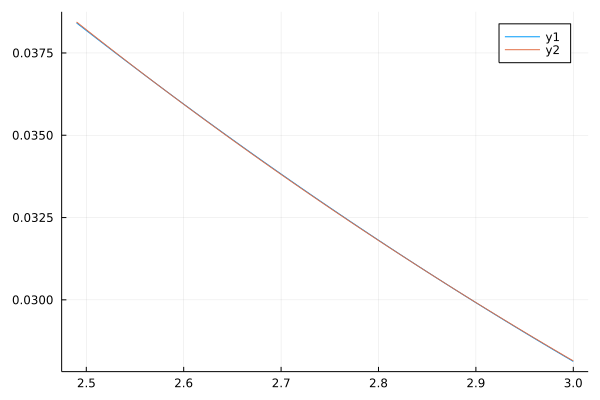

In [264]:
using EasyFit
xs = times[250:end]
ys = detectable[250:end]
fit = fitexp(xs, ys, c = 0)
display(fit)
plot(xs, ys)
plot!(fit.x, fit.y)

In [126]:
using CSV

In [ ]:
function squared_error()